# Proyek Akhir: Menyelesaikan Permasalahn Jaya Jaya Institut 

- Nama: Muhammad Ikhwananda Rizaldi
- Email: aldirizaldy977@gmail.com
- ID Dicoding: ikhwananda

_________________________________________________________________

## Langkah-langkah Analisis

1. Eksplorasi Data Analysis (EDA)
    - Memahami struktur dataset
    - Analisis statistik deskriptif
    - Visualisasi distribusi data
2. Pra-pemrosesan Data
    - Penanganan nilai yang hilang
    - Encoding variabel kategorikal
    - Normalisasi/standardisasi fitur numerik
    - Penanganan ketidakseimbangan kelas (jika ada)
    - Menerapkan PCA untuk reduksi dimensi
3. Pemodelan
    - Membagi data menjadi set pelatihan dan pengujian
    - Mencoba beberapa algoritma klasifikasi (Random Forest, Logistic Regression, XGBoost, dll)
    - Evaluasi dan perbandingan model
4. Evaluasi Model
    - Metrik evaluasi (akurasi, presisi, recall, F1-score, AUC-ROC)
    - Cross-validation untuk memastikan keandalan model
5. Interpretasi Hasil
    - Mengidentifikasi faktor-faktor utama yang menyebabkan dropout
    - Memberikan rekomendasi untuk intervensi.

In [2]:
# Import library yang diperlukan
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRFClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

sns.set()

In [3]:
# Membaca dataset
df = pd.read_csv('./data/data.csv', sep=';')

### Exploratory Data Analysis (EDA)

In [4]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [6]:
print('Mendeteksi data yang hilang: \n', df.isna().sum())

Mendeteksi data yang hilang: 
 Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment  

In [7]:
# Melihat statistik deskriptif dari dataset
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0
Application_mode,4424.0,19.0,17.0,1.0,1.0,17.0,39.0,57.0
Application_order,4424.0,2.0,1.0,0.0,1.0,1.0,2.0,9.0
Course,4424.0,8857.0,2064.0,33.0,9085.0,9238.0,9556.0,9991.0
Daytime_evening_attendance,4424.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
Previous_qualification,4424.0,5.0,10.0,1.0,1.0,1.0,1.0,43.0
Previous_qualification_grade,4424.0,133.0,13.0,95.0,125.0,133.0,140.0,190.0
Nacionality,4424.0,2.0,7.0,1.0,1.0,1.0,1.0,109.0
Mothers_qualification,4424.0,20.0,16.0,1.0,2.0,19.0,37.0,44.0
Fathers_qualification,4424.0,22.0,15.0,1.0,3.0,19.0,37.0,44.0


Persentase distribusi status siswa:
Status
Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: proportion, dtype: float64


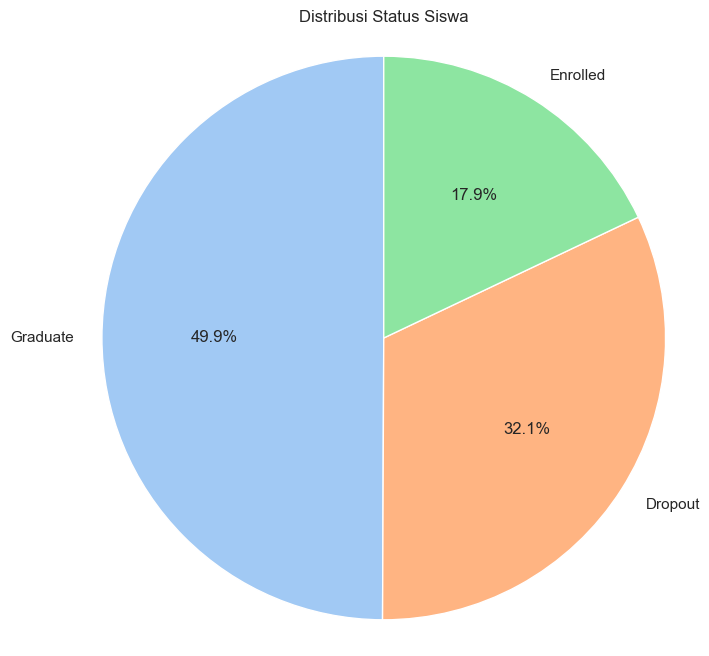

In [8]:
# Melihat persentase distribusi status siswa
status_counts = df['Status'].value_counts(normalize=True) * 100
print("Persentase distribusi status siswa:")
print(status_counts)

# Visualisasi dengan pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribusi Status Siswa')
plt.axis('equal')
plt.show()

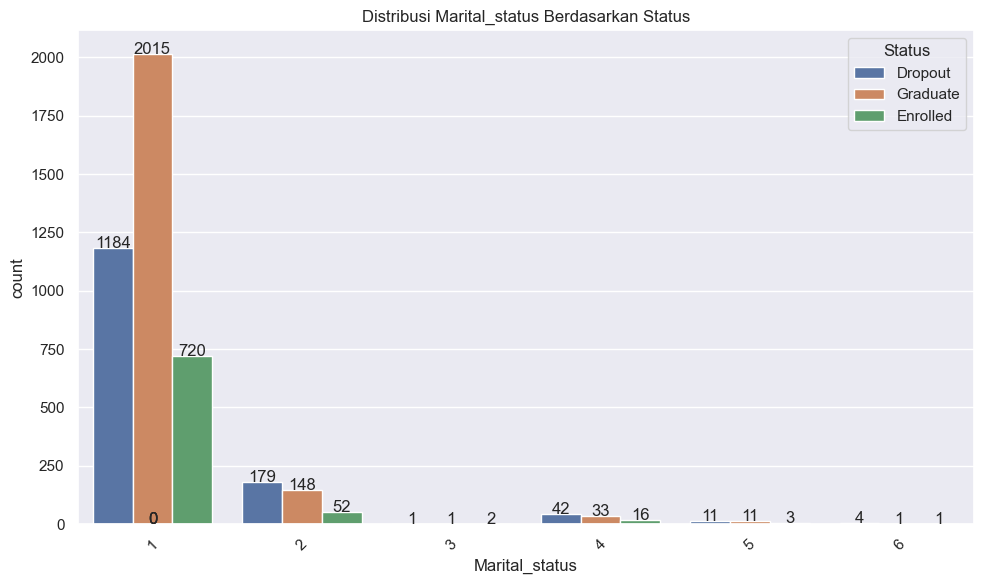

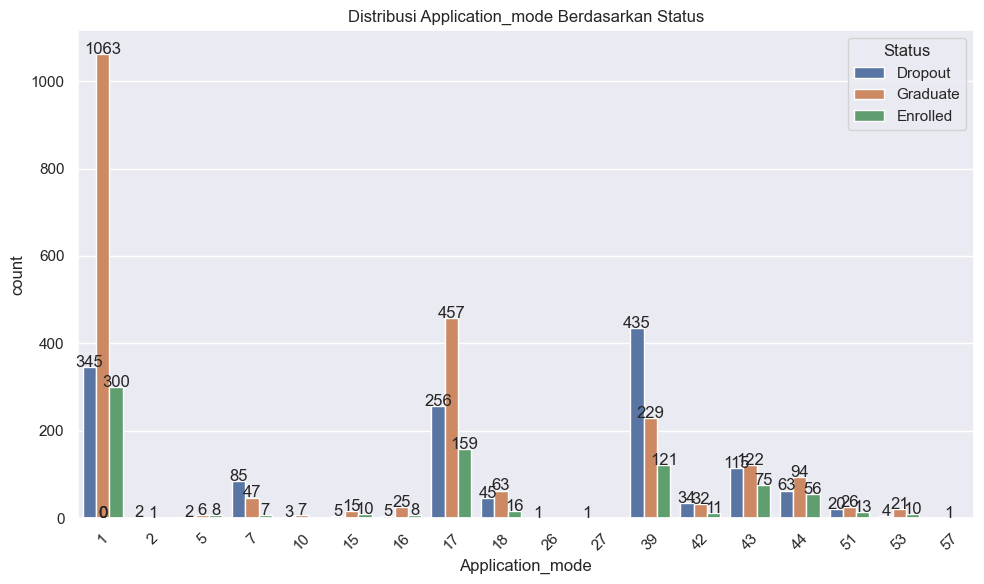

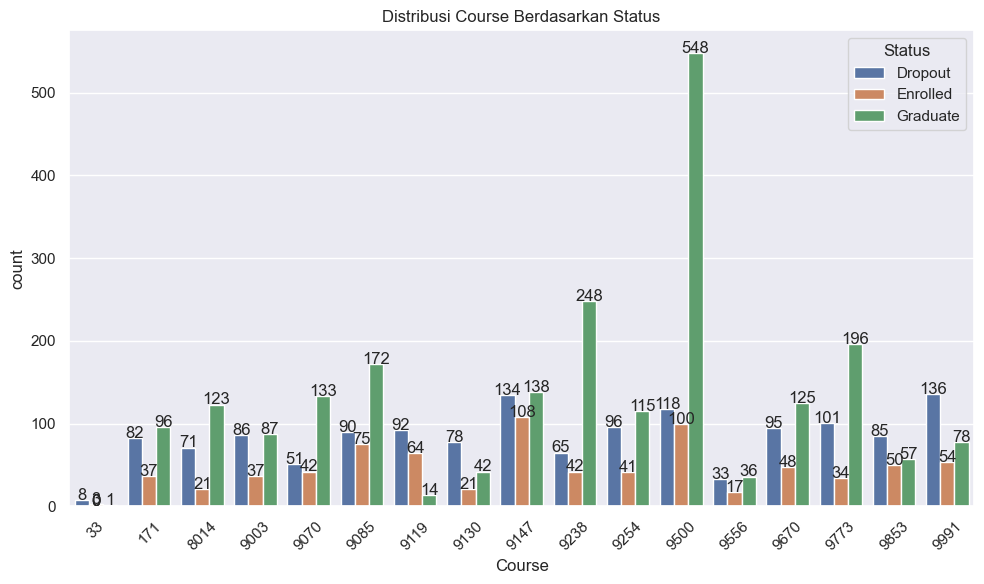

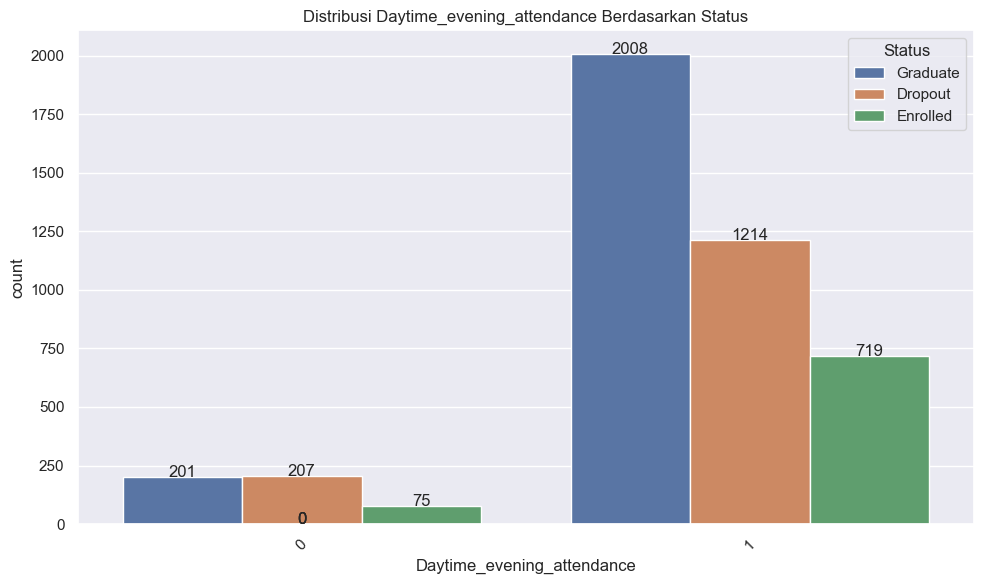

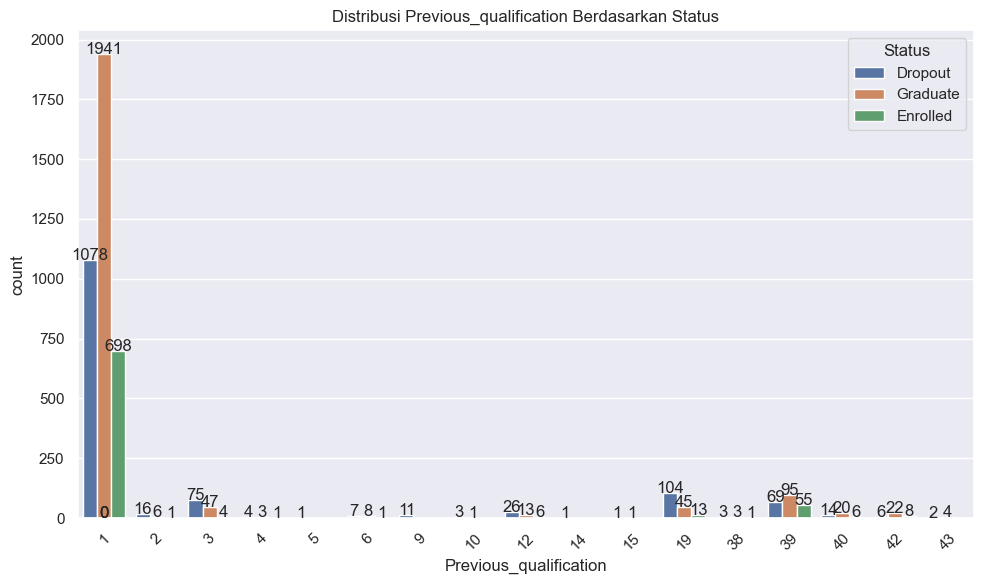

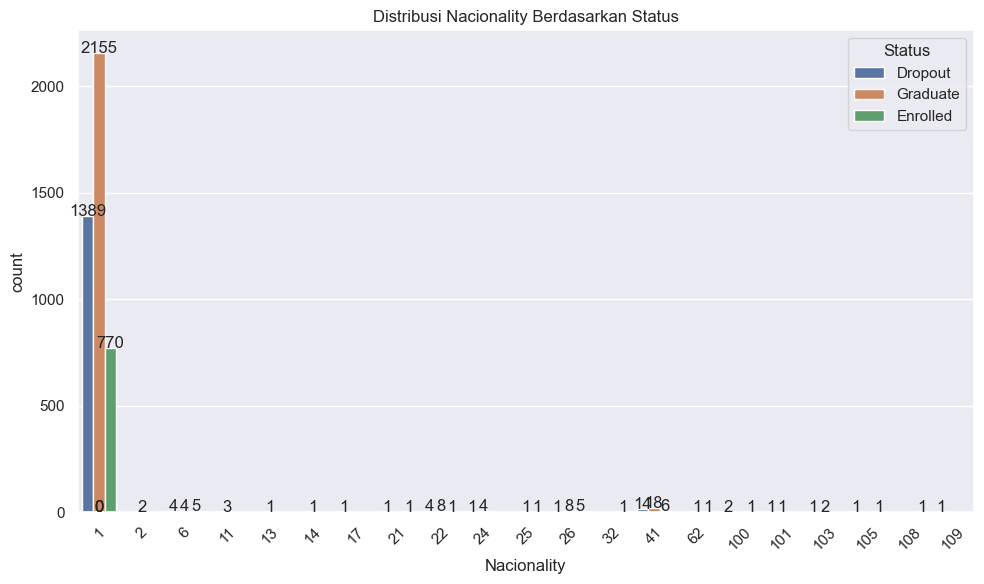

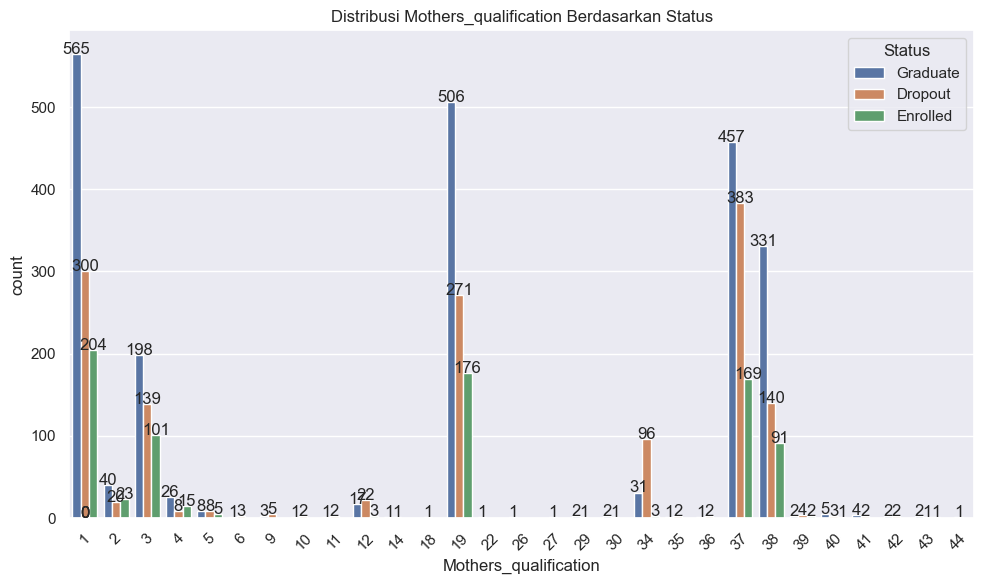

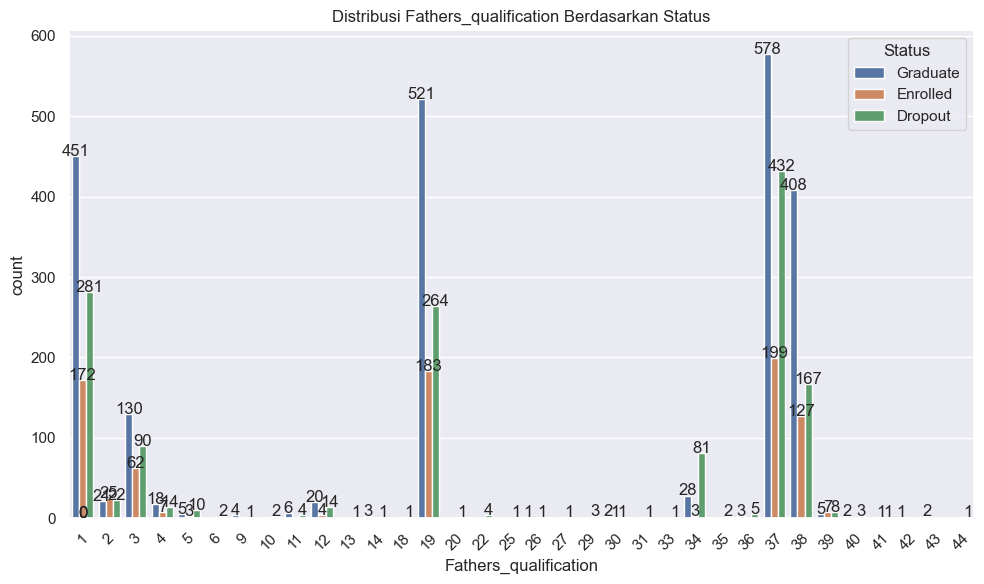

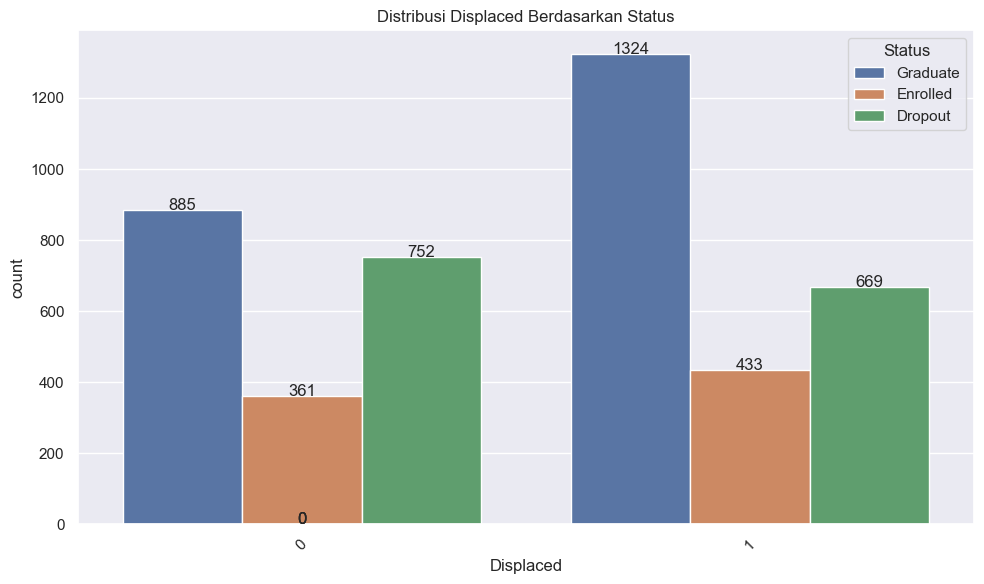

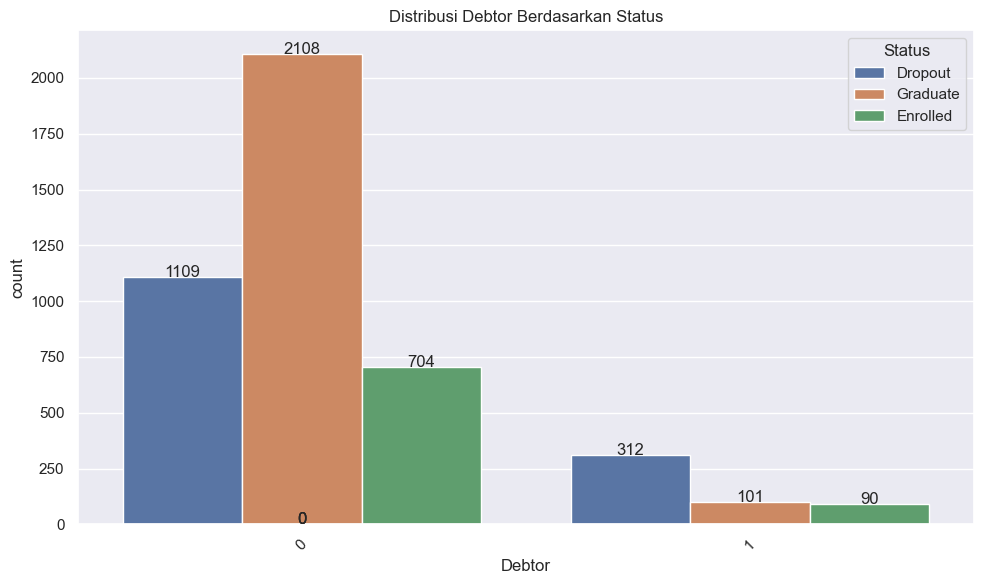

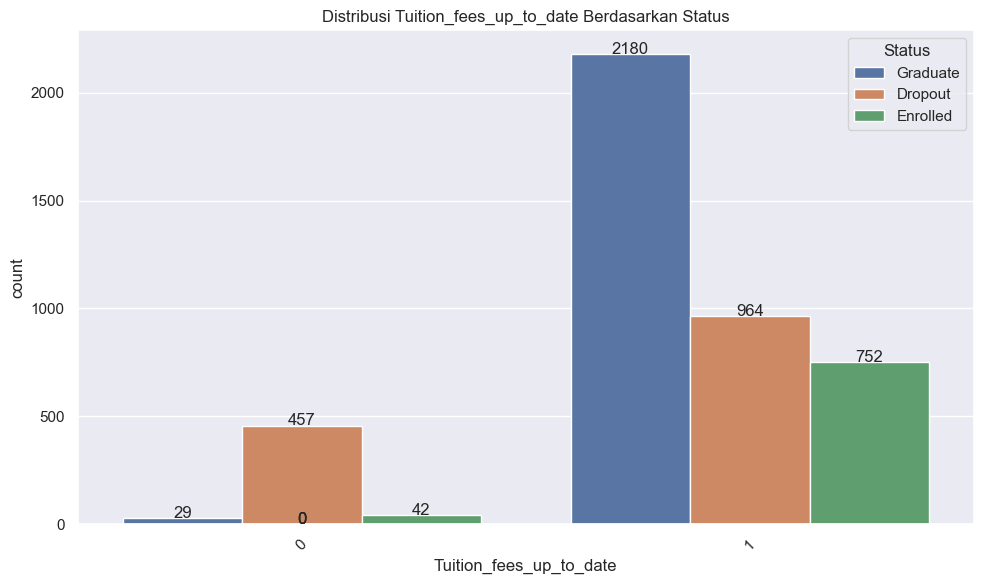

In [9]:
# Fungsi untuk visualisasi variabel kategorik
def plot_categorical(column):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x=column, hue='Status')
    plt.title(f'Distribusi {column} Berdasarkan Status')
    plt.xticks(rotation=45)
    
    # Menambahkan persentase di atas bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 0.1, f'{height:.0f}', ha='center')
    
    plt.tight_layout()
    plt.show()
    

# Visualisasi beberapa variabel kategorik penting
categorical_columns = ['Marital_status', 'Application_mode', 'Course', 'Daytime_evening_attendance',
                       'Previous_qualification', 'Nacionality', 'Mothers_qualification', 
                       'Fathers_qualification', 'Displaced', 'Debtor', 'Tuition_fees_up_to_date']

for col in categorical_columns:
    plot_categorical(col)

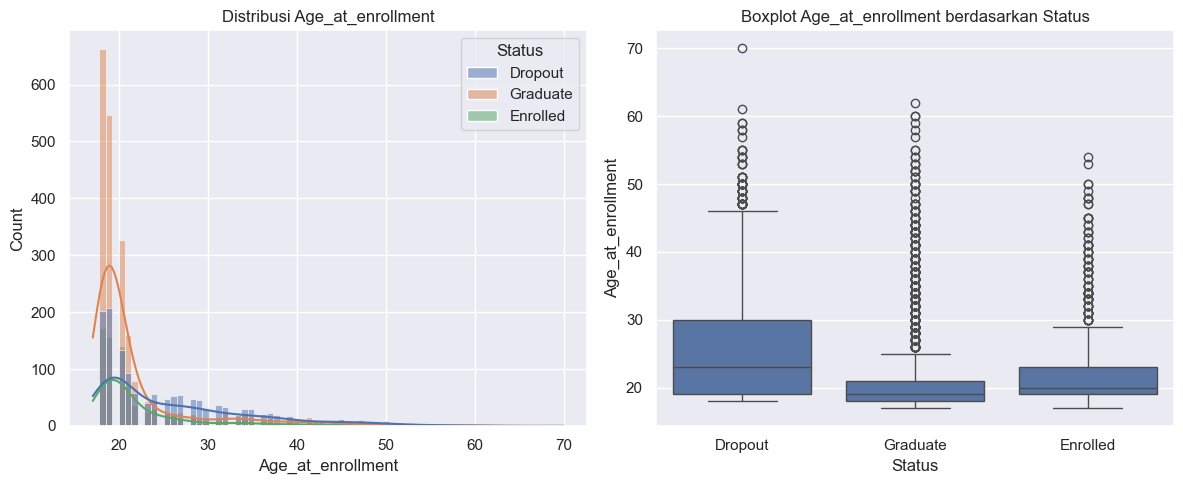

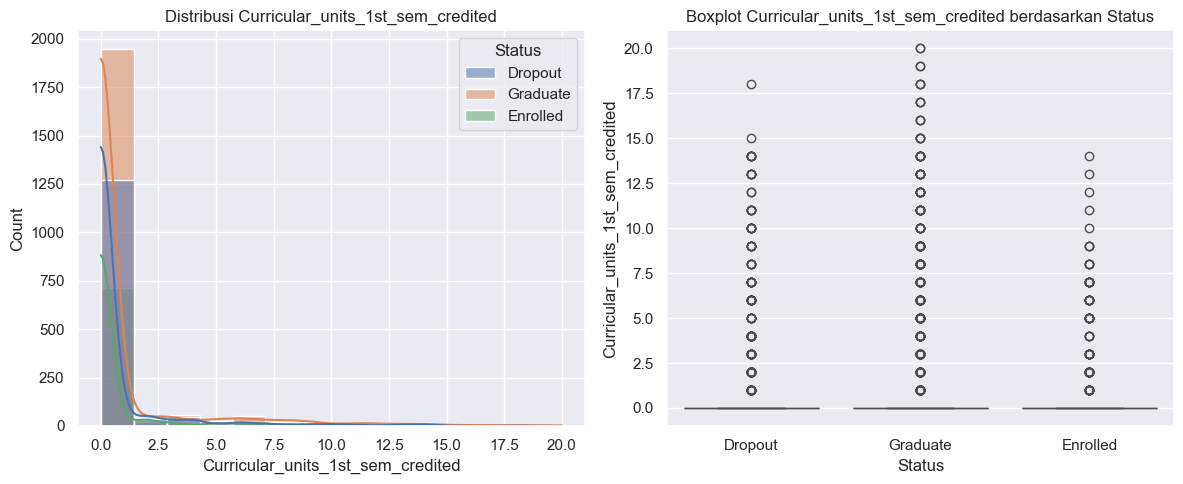

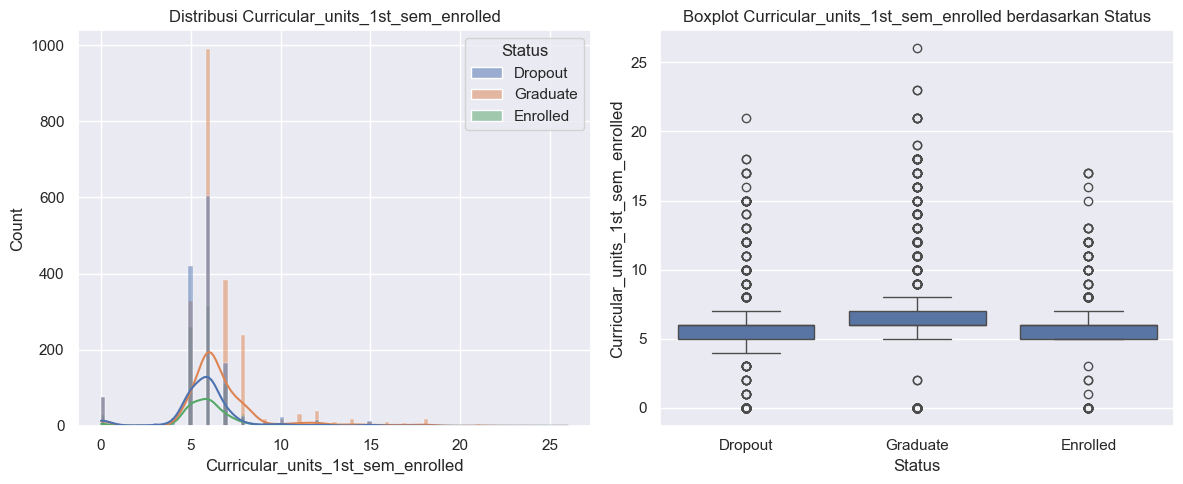

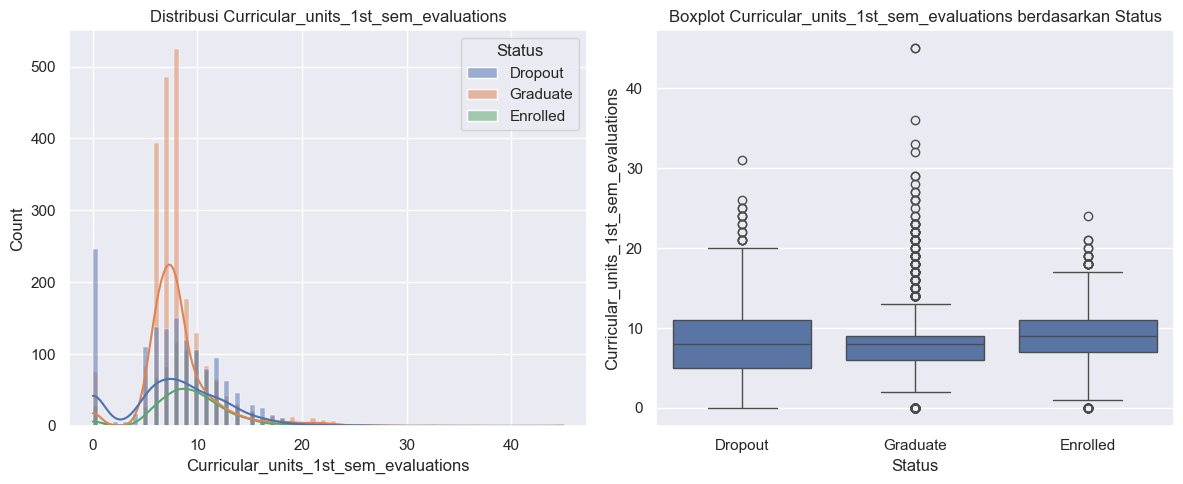

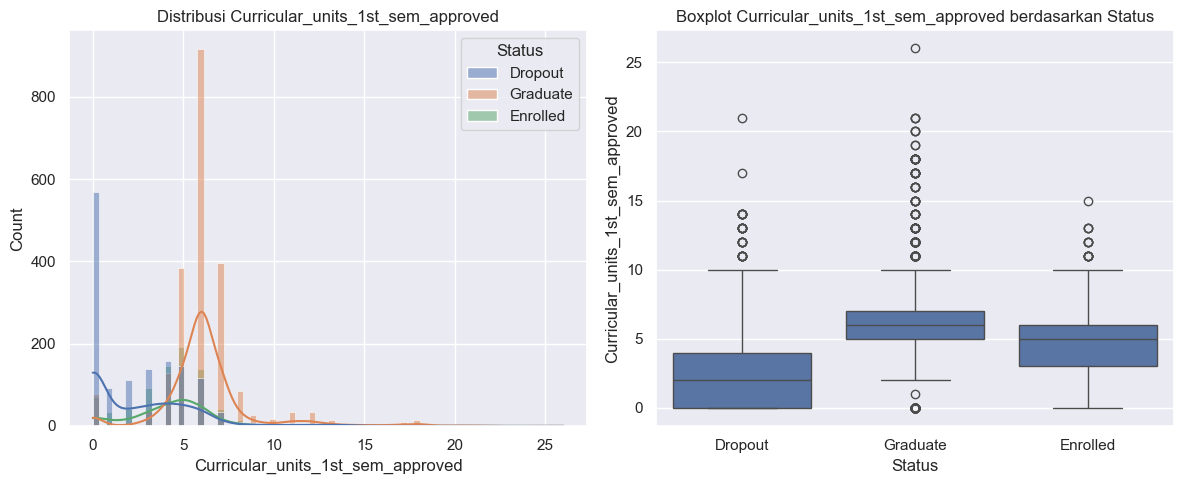

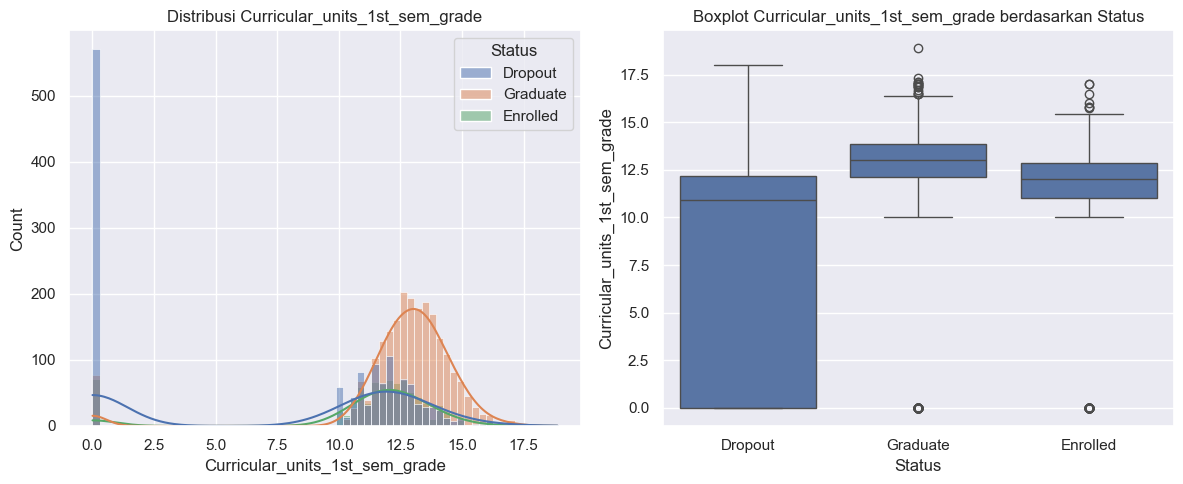

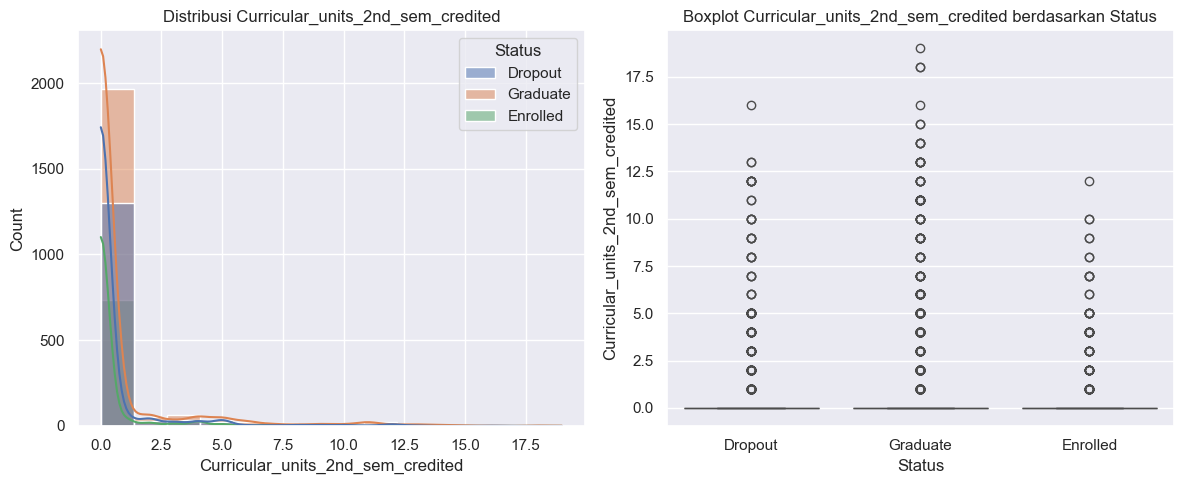

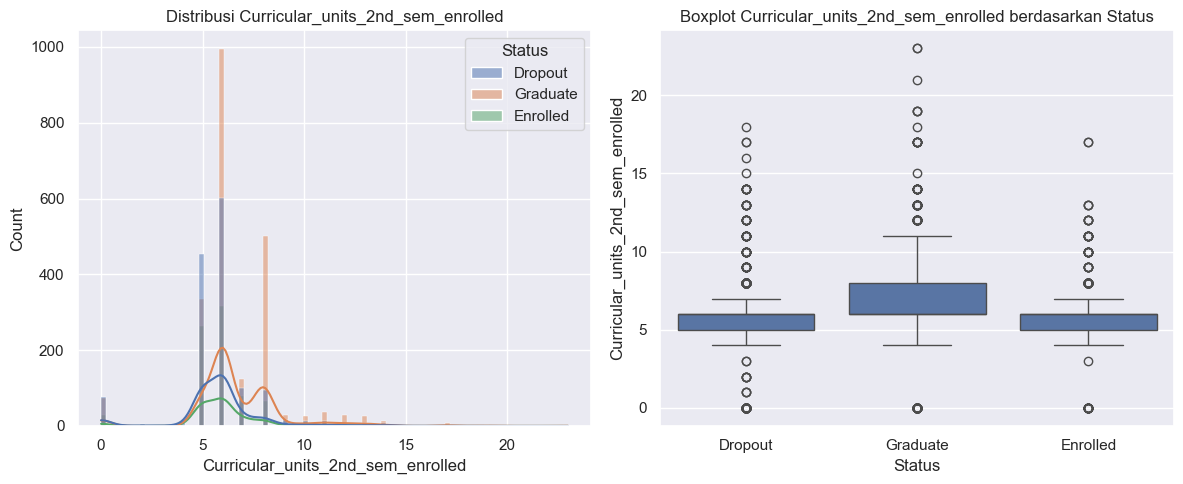

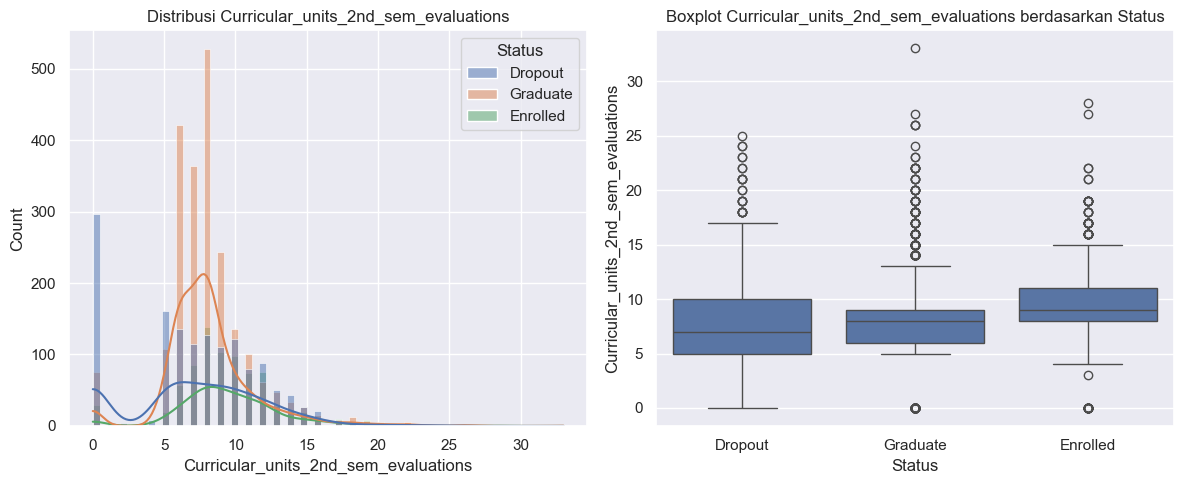

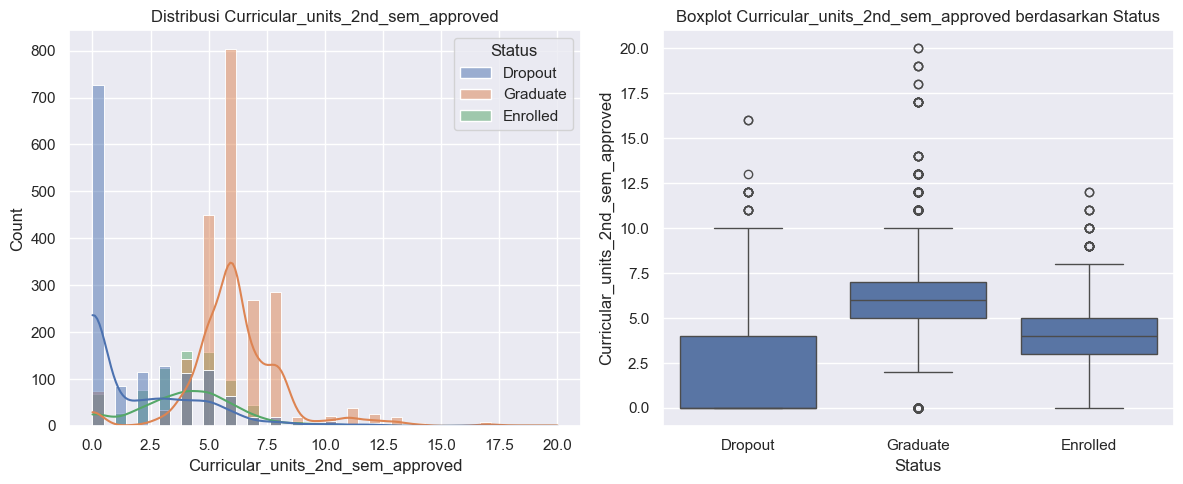

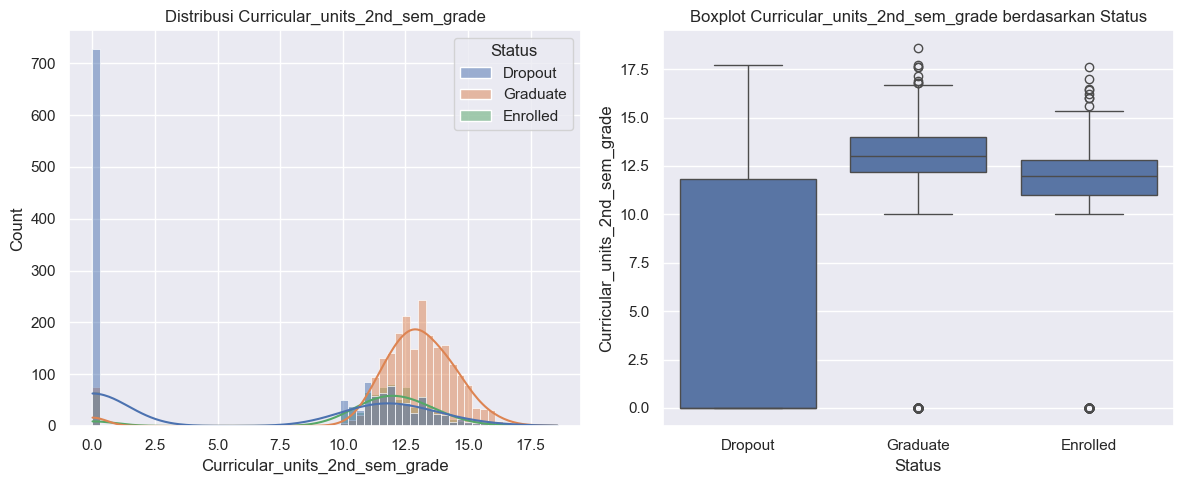

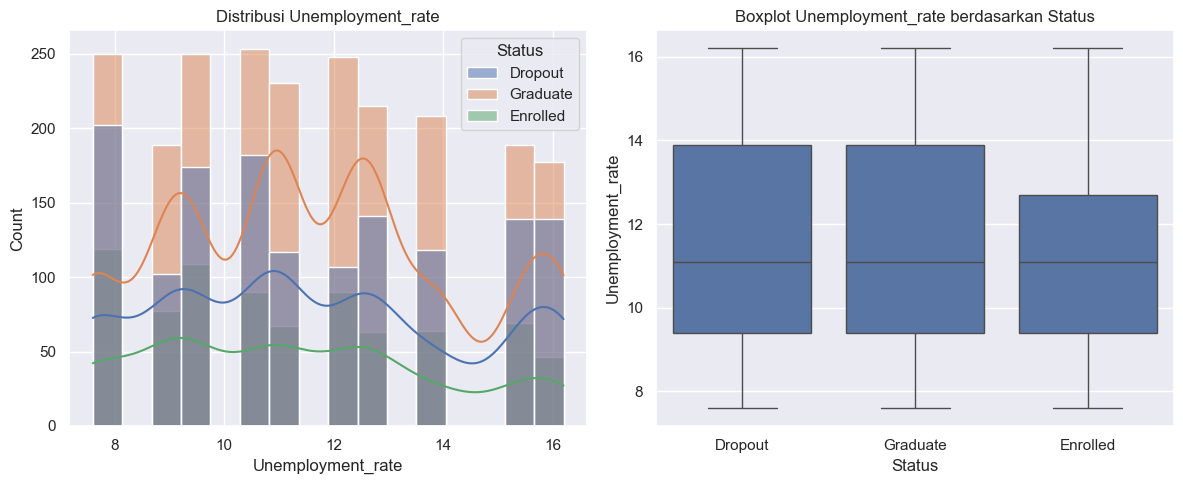

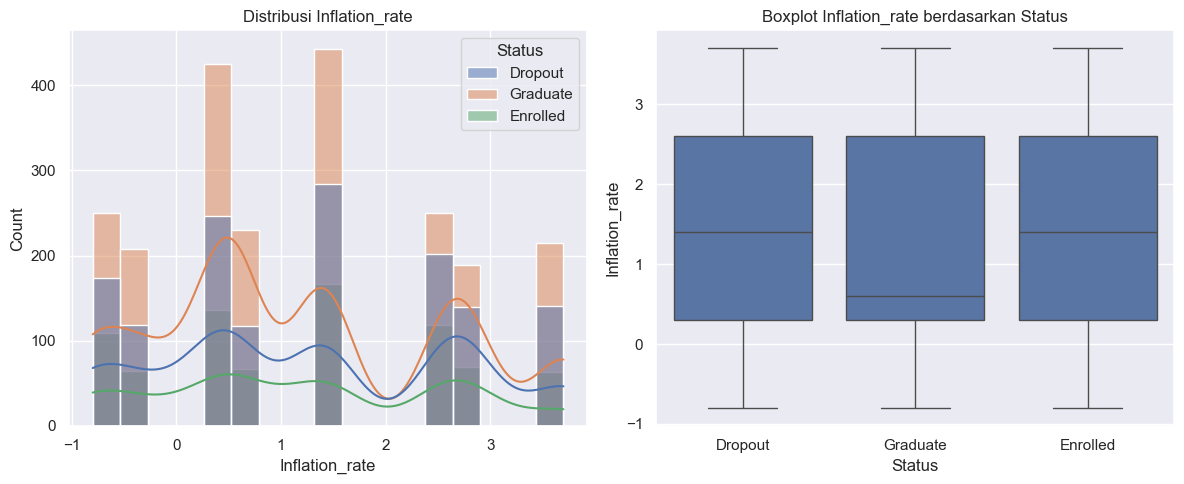

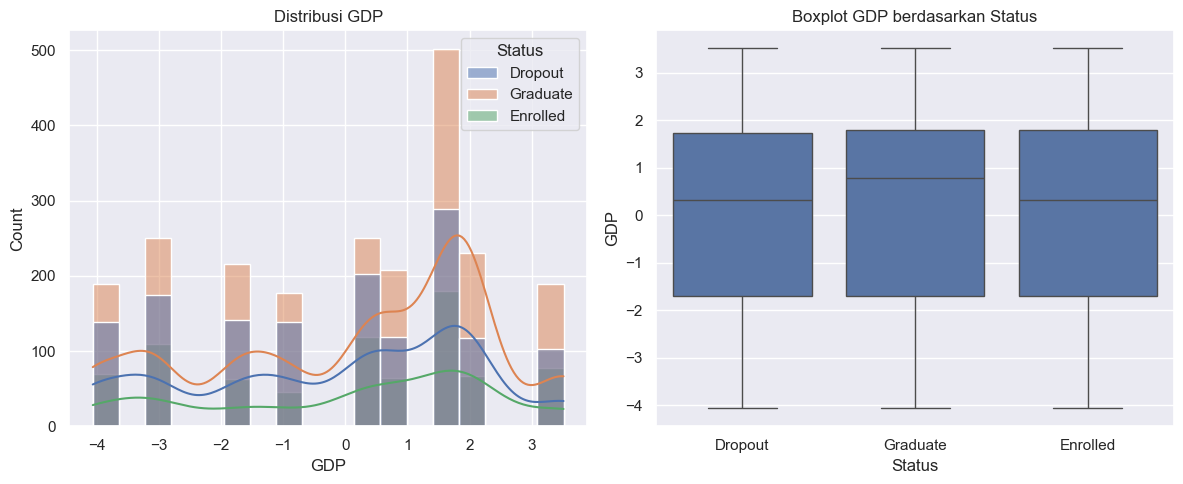

In [10]:
# Fungsi untuk visualisasi distribusi variabel numerik
def plot_numerical(column):
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=column, hue='Status', kde=True)
    plt.title(f'Distribusi {column}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='Status', y=column)
    plt.title(f'Boxplot {column} berdasarkan Status')
    
    plt.tight_layout()
    plt.show()
    
    
# Visualisasi beberapa variabel numerik penting
numerical_columns = ['Age_at_enrollment', 'Curricular_units_1st_sem_credited', 
                     'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations',
                     'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
                     'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled',
                     'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved',
                     'Curricular_units_2nd_sem_grade', 'Unemployment_rate', 'Inflation_rate', 'GDP']

for column in numerical_columns:
    plot_numerical(column)

In [11]:
# Membuat DataFrame baru dengan variabel target numerik (0 untuk dropout, 1 untuk Graduate, 0.5 untuk Enrolled)
df_numeric = df.copy()
df_numeric['Status_numeric'] = df_numeric['Status'].map({'Dropout': 0, 'Graduate': 1, 'Enrolled': 0.5})

# Memilih hanya kolom numerik untuk korelasi
numeric_cols = df_numeric.select_dtypes(include=['int64', 'float64']).columns

# Menghitung korelasi dengan target
correlation_with_target = df_numeric[numeric_cols].corr()['Status_numeric'].sort_values(ascending=False)
print('Korelasi fitur dengan Status (Graduate = 1, Dropout = 0, Enrolled = 0.5):')
print(correlation_with_target)

Korelasi fitur dengan Status (Graduate = 1, Dropout = 0, Enrolled = 0.5):
Status_numeric                                  1.000000
Curricular_units_2nd_sem_approved               0.624157
Curricular_units_2nd_sem_grade                  0.566827
Curricular_units_1st_sem_approved               0.529123
Curricular_units_1st_sem_grade                  0.485207
Tuition_fees_up_to_date                         0.409827
Scholarship_holder                              0.297595
Curricular_units_2nd_sem_enrolled               0.175847
Curricular_units_1st_sem_enrolled               0.155974
Admission_grade                                 0.120889
Displaced                                       0.113986
Previous_qualification_grade                    0.103764
Curricular_units_2nd_sem_evaluations            0.092721
Application_order                               0.089791
Daytime_evening_attendance                      0.075107
Curricular_units_2nd_sem_credited               0.054004
Curricular_uni

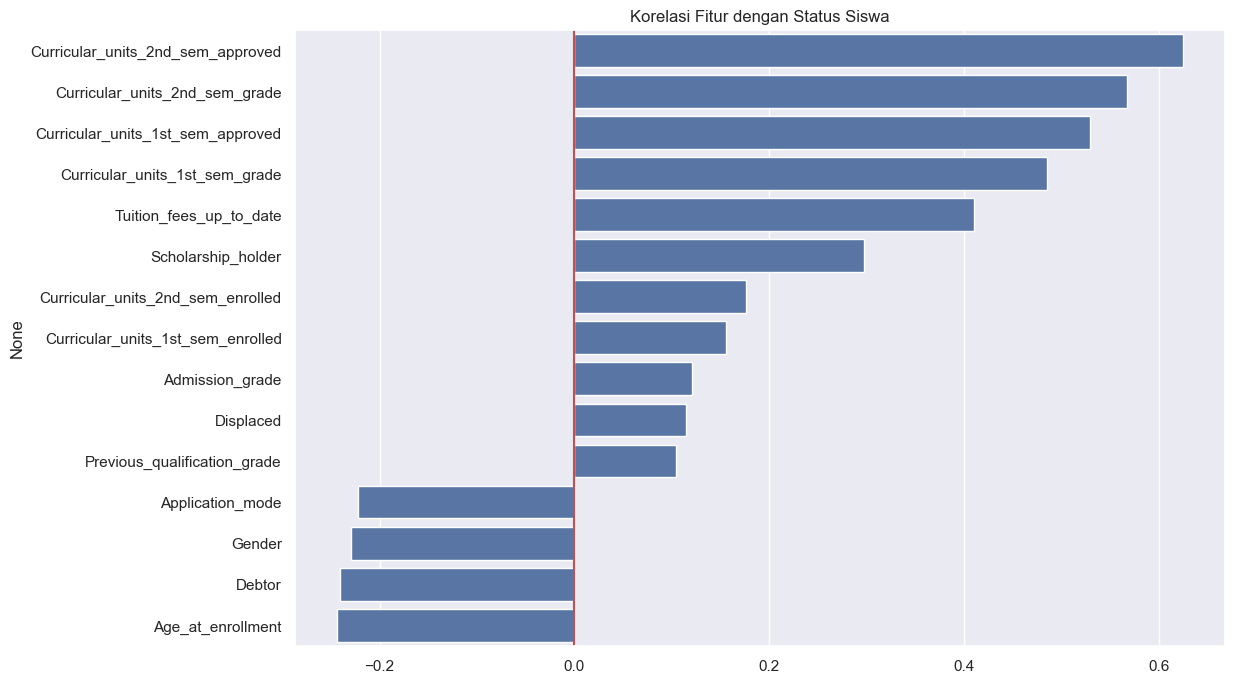

In [12]:
# Visualisasi korelasi dengan target
plt.figure(figsize=(12, 8))
correlation_with_target = correlation_with_target.drop('Status_numeric') # Menghapus self-correlation
correlation_with_target = correlation_with_target[abs(correlation_with_target) > 0.1] # Filter korelasi yang > 0.1
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index)
plt.title('Korelasi Fitur dengan Status Siswa')
plt.axvline(x=0, color='r', linestyle='-')
plt.show()

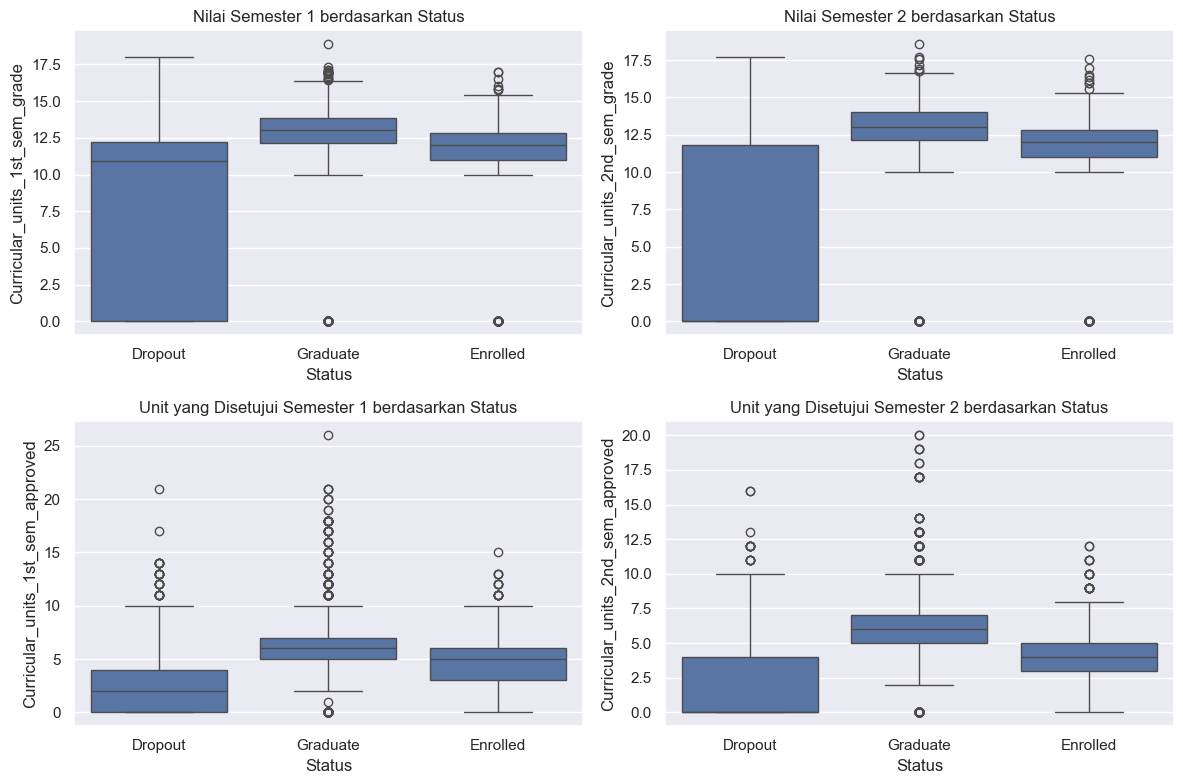

In [13]:
# Membandingkan performa akademik semester 1 dan 2 berdasarkan status
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='Status', y='Curricular_units_1st_sem_grade')
plt.title('Nilai Semester 1 berdasarkan Status')

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Status', y='Curricular_units_2nd_sem_grade')
plt.title('Nilai Semester 2 berdasarkan Status')

plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='Status', y='Curricular_units_1st_sem_approved')
plt.title('Unit yang Disetujui Semester 1 berdasarkan Status')

plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='Status', y='Curricular_units_2nd_sem_approved')
plt.title('Unit yang Disetujui Semester 2 berdasarkan Status')

plt.tight_layout()
plt.show()

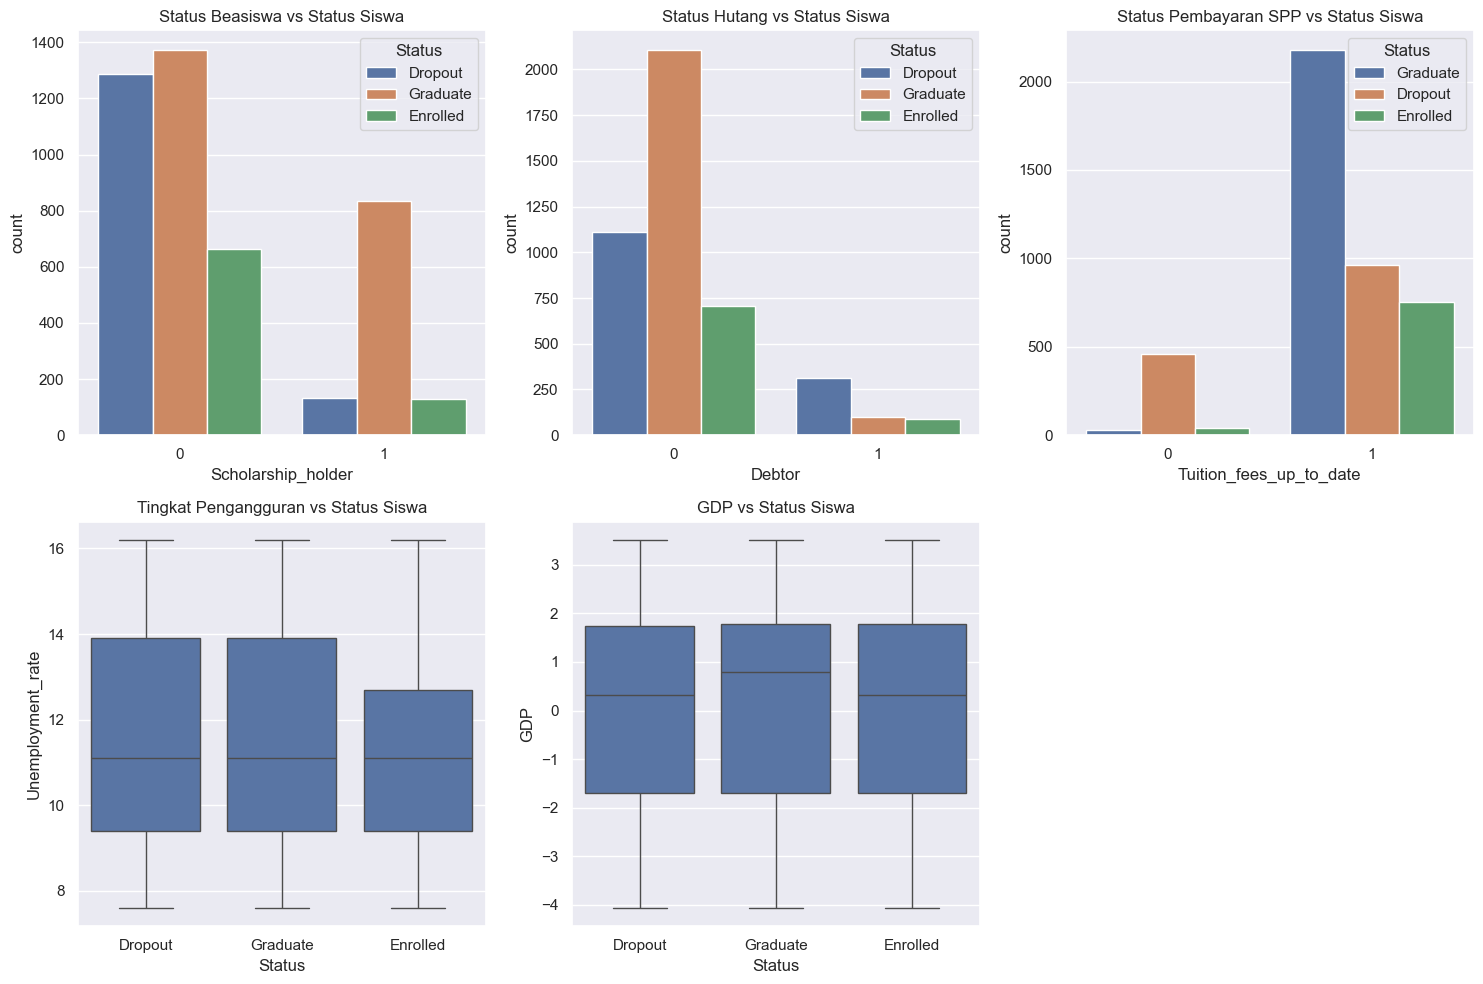

In [14]:
# Visualisasi faktor sosio-ekonomi
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.countplot(data=df, x='Scholarship_holder', hue='Status')
plt.title('Status Beasiswa vs Status Siswa')

plt.subplot(2, 3, 2)
sns.countplot(data=df, x='Debtor', hue='Status')
plt.title('Status Hutang vs Status Siswa')

plt.subplot(2, 3, 3)
sns.countplot(data=df, x='Tuition_fees_up_to_date', hue='Status')
plt.title('Status Pembayaran SPP vs Status Siswa')

plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Status', y='Unemployment_rate')
plt.title('Tingkat Pengangguran vs Status Siswa')

plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='Status', y='GDP')
plt.title('GDP vs Status Siswa')

plt.tight_layout()
plt.show()

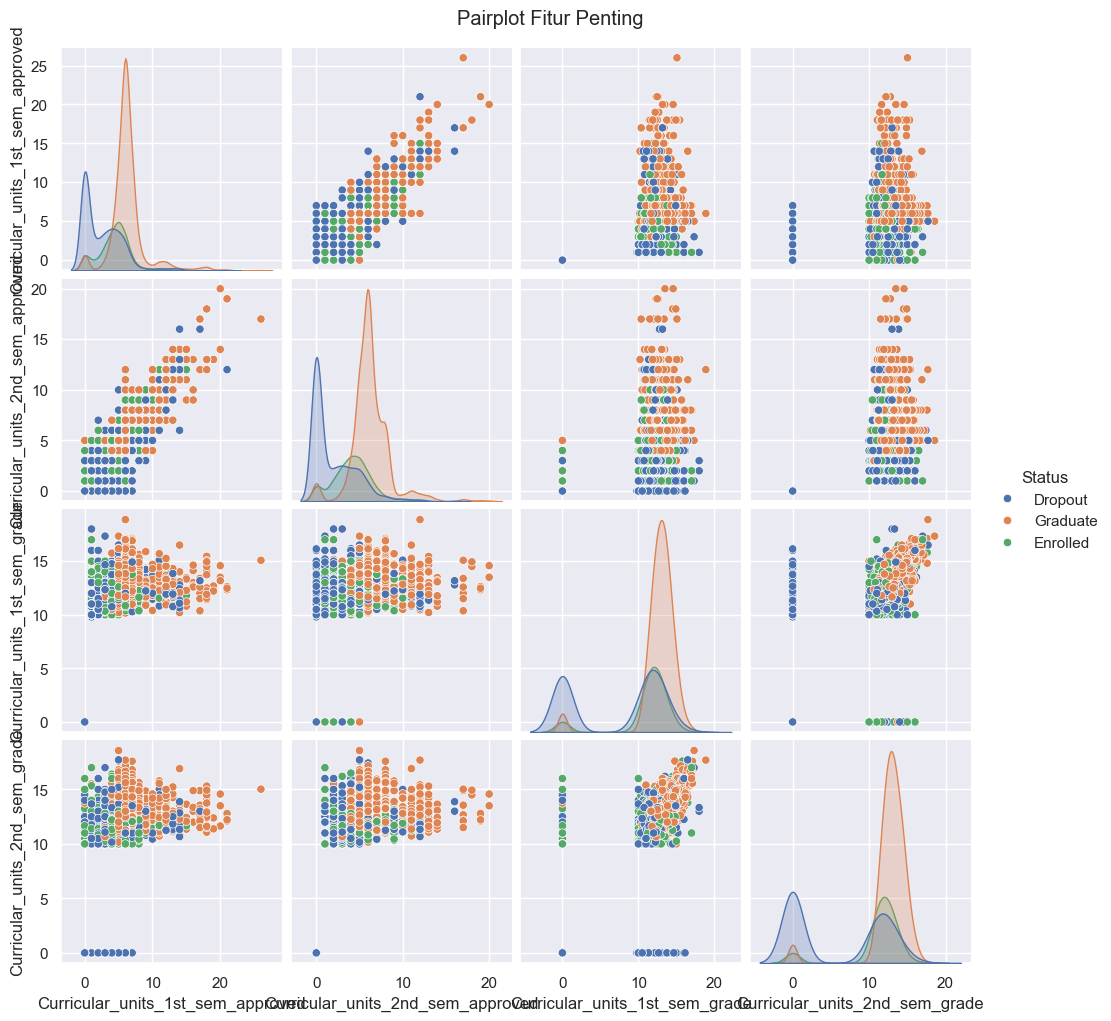

In [15]:
# Memilih beberapa fitur penting berdasarkan korelasi
important_features = ['Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_approved', 
                      'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade', 
                      'Status']


# Membuat pairplot
sns.pairplot(df[important_features], hue='Status', diag_kind='kde')
plt.suptitle('Pairplot Fitur Penting', y=1.02)
plt.show()

Insight dari proses Exploratory Data Analysis (EDA)

##### Distribusi Status Siswa
- Dataset menunjukkan distribusi status siswa dengan komposisi: Graduate (±50%), Dropout (±32%), dan Enrolled (±18%)
- Ketidakseimbangan kelas ini perlu diperhatikan saat pemodelan untuk menghindari bias prediksi

##### Performa Akademik
- Korelasi Kuat dengan Status: Performa akademik (terutama jumlah unit yang disetujui dan nilai) memiliki korelasi tertinggi dengan status siswa
- Pola Semester 1 vs Semester 2: Terlihat perbedaan signifikan antara mahasiswa Dropout dan Gradiate dalam hal:
    - Jumlah unit yang disetujui (approved)
    - Nilai rata-rata (grade)

- Pariplot Menunjukkan Seperasi: Dari visualisasi pairplot, terlihat jelas bahwa mahasiswa Graduate cenderung memiliki nilai dan jumlah unit yang disetujui lebih tinggi dibandingkan mahasiswa Dropout.

##### Faktor Sisio-Ekonomi
- Status Pembayaran: Mahasiswa dengan status pembayaran SPP yang tidak up-to-date memiliki kecendrungan dropout lebih tinggi.
- Status Hutang: Mahasiswa dengan status debtor memiliki tingkat dropout yang lebih tinggi
- Beasiswa: Peneriam beasiswa cenderung memiliki tingkat kelulusan yang lebih tinggi

##### Faktor Demografis
- Usia: Mahasiswa yang lebih tua saat pendaftaran memiliki risiko dropout yang lebih tinggi
- Status Pernikahan: Terdapat perbedaan pola dropout berdasarkan status pernikahan

##### Faktor Ekonomi Makro
- GDP dan Tingkat Pengangguran: Terdapat indikasi bahwa faktor ekonomi makro seperti GDP dan tingkat pengangguran memiliki pengaruh terhadap status siswa, meskipun korelasinya tidak sekuat faktor akademik.

##### Hubungan Antar Variabel
- Dari pairplot terlihat hubungan positif yang kuat antara performa semester 1 dan semeter 2
- Mahasiswa yang berperforma baik di semester 1 cenderung juga berperforma baik di semester 2
- Terdapat pola yang jelas memisahkan kelompok Graduate (warna oranye) dan Dropout (warna biru) berdasarkan performa akademik.


##### Implikasi untuk Pemodelan
- Fitur akademik (terutama jumlah unit yang disetujui dan nilai) akan menjadi prediktor kuat untuk model
- Perlu mempertimbangkan kombinasi faktor akademik dan sosio-ekonomi untuk prediksi yang lebih akurat
- Intervensi awal berdasarkan performa semester 1 dapat menjadi strategi efektif untuk mencegah dropout.


### Pra-pemrosesan Data

In [16]:
# 1. Persiapan data
# Memisahkan fitur dan target
X = df.drop('Status', axis=1)
y = df['Status']

label_encoder = LabelEncoder()

# Encode variabel target
y_encoded = label_encoder.fit_transform(y)

# 2. Identifikasi kolom kategorikal dan numeri
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 3. Membuat pipeline preprocessing
# Pipeline untuk preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

# 4. Menerapkan PCA
# Buat pipeline dengan PCA
pca_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95)) # Mempertahankan 95% variance
])

# 5. Pembagian data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y)

# 6. Fit dan transform data training
X_train_pca = pca_pipeline.fit_transform(X_train)
X_test_pca = pca_pipeline.transform(X_test)

# 7. Melihat jumlah komponen dan variance explained
n_components = pca_pipeline.named_steps['pca'].n_components_
explained_variance = pca_pipeline.named_steps['pca'].explained_variance_ratio_

print(f'Jumlah komponen PCA: {n_components}')
print(f'Total variance explained: {sum(explained_variance):.2f}')
print("Mapping kelas:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label} -> {i}")

Jumlah komponen PCA: 26
Total variance explained: 0.96
Mapping kelas:
Dropout -> 0
Enrolled -> 1
Graduate -> 2


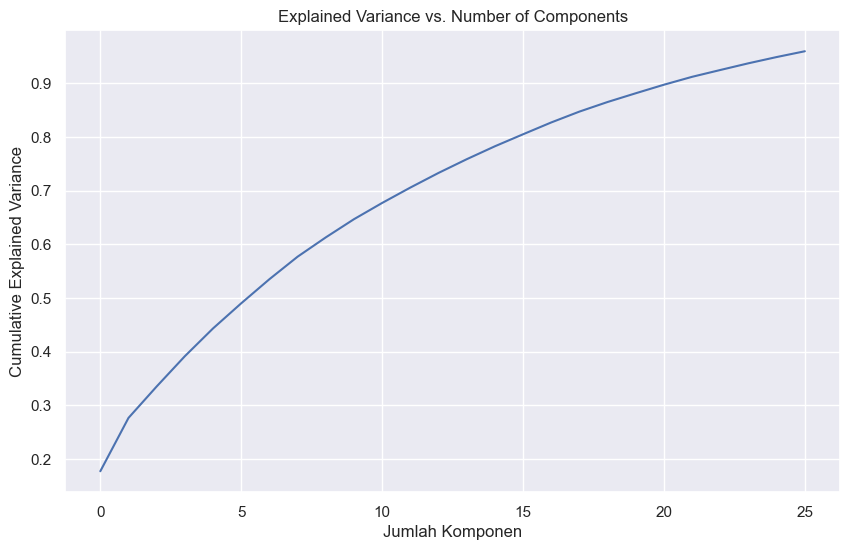

In [17]:
# Visualisasi variance explained
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Jumlah Komponen')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

**Teknik Penanganan Ketidakseimbangan Kelas**

In [18]:
# 1. Menggunakan SMOTE (Synthetic Minority Over-sampling Technique)
from imblearn.over_sampling import SMOTE

# Terapkan SMOTE pada data training yang sudah di-PCA
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_pca, y_train)

# Melihat distribusi kelas setelah SMOTE
print('Distribusi kelas setelah SMOTE:')
print(pd.Series(y_train_balanced).value_counts(normalize=True) * 100)


# Hitung bobot kelas
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
print('Class weights:', class_weight_dict)

Distribusi kelas setelah SMOTE:
2    33.333333
0    33.333333
1    33.333333
Name: proportion, dtype: float64
Class weights: {0: 1.0375256523013778, 1: 1.857742782152231, 2: 0.6676098849273722}


c:\Users\Aldi\anaconda3\envs\env-1\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\Aldi\anaconda3\envs\env-1\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Aldi\anaconda3\envs\env-1\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Aldi\anaconda3\envs\env-1\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Aldi\anaconda3\envs\env-1\Lib\subprocess.py", line 1538, in _execute_child
    h

**Evaluasi Metode Penanganan Ketidakseimbangan**

Evaluasi data dengan asli (tidak seimbang):
Classification Report untuk Random Forest:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       284
           1       0.49      0.25      0.33       159
           2       0.75      0.90      0.82       442

    accuracy                           0.73       885
   macro avg       0.67      0.63      0.63       885
weighted avg       0.71      0.73      0.71       885

Kelas yang dikenali model: [0 1 2]


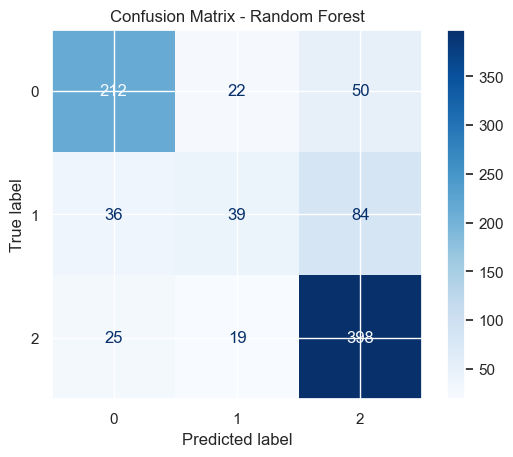

In [19]:
# Fungsi untuk evaluasi model dengan berbagai metode penanganan ketidakseimbangan
def evaluate_model(X_train, y_train, X_test, y_test, model_name='Random Forest'):
    if model_name == 'Random Forest':
        model = RandomForestClassifier(random_state=42)
    elif model_name == 'Logistic Regression':
        model = LogisticRegression(random_state=42)
    elif model_name == 'Gradient Boosting':
        model = GradientBoostingClassifier(random_state=42)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f'Classification Report untuk {model_name}:')
    print(classification_report(y_test, y_pred))
    print('Kelas yang dikenali model:', model.classes_)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    
    return model


# Evaluasi dengan data asli (tidak seimbang)
print('Evaluasi data dengan asli (tidak seimbang):')
model_original = evaluate_model(X_train_pca, y_train, X_test_pca, y_test)


Evaluasi dengan SMOTE:
Classification Report untuk Random Forest:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       284
           1       0.42      0.44      0.43       159
           2       0.80      0.81      0.80       442

    accuracy                           0.72       885
   macro avg       0.66      0.66      0.66       885
weighted avg       0.72      0.72      0.72       885

Kelas yang dikenali model: [0 1 2]


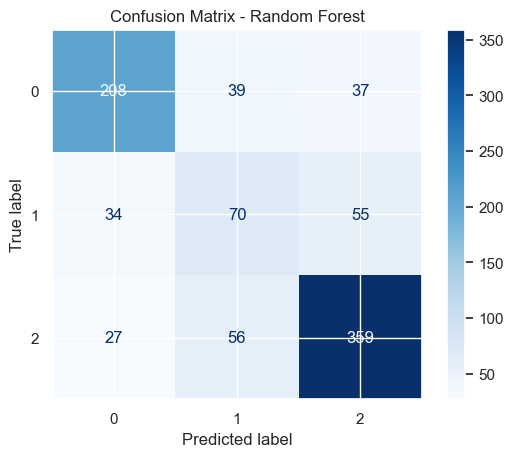

In [20]:
# Evaluasi dengan SMOTE
print("Evaluasi dengan SMOTE:")
model_smote = evaluate_model(X_train_balanced, y_train_balanced, X_test_pca, y_test)

In [21]:
# Evaluasi dengan class weights (untuk Random Forest)
print("Evaluasi dengan class weights:")
rf_weighted = RandomForestClassifier(random_state=42, class_weight=class_weight_dict)
rf_weighted.fit(X_train_pca, y_train)
y_pred_weighted = rf_weighted.predict(X_test_pca)
print(classification_report(y_test, y_pred_weighted))

Evaluasi dengan class weights:
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       284
           1       0.43      0.19      0.26       159
           2       0.73      0.90      0.80       442

    accuracy                           0.71       885
   macro avg       0.64      0.60      0.60       885
weighted avg       0.68      0.71      0.69       885



**Analisis Hasil SMOTE vs Non-SMOTE**

Berdasarkan hasil yang ditampilkan:

- Model tanpa SMOTE: Akurasi 73%
- Model dengan SMOTE: Akurasi 72%

Meskipun ada penurunan akurasi sebesar 1%, ada beberapa pertimbangan penting:

**Alasan untuk Tetap Menggunakan SMOTE**:
1. Performa pada Kelas Minoritas (Enrolled):
    - Tanpa SMOTE: Recall 25% (hanya mengenali 25% dari siswa Enrolled)
    - Dengan SMOTE: Recall 44% (hampir dua kali lipat lebih baik)
    - Ini menunjukkan peningkatan signifikan dalam kemampuan model mengenali kelas minoritas

2. Keseimbagan Performa Antar Kelas:
    - Dengan SMOTE, macro avg recall meningkat dari 63% menjadi 66%
    - Ini menunjukkan model lebih seimbang dalam mengenali semua kelas

3. Generalisasi untuk Data Baru:
    - Model yang dilatih dengan data seimbang cenderung lebih robust ketika menghadapi distribusi data yang berubah di masa depan
    - Ini penting jika proporsi jelas di lingkungan produsi bisa berfluktuasi
    
4. Tujuan Bisnis:
    - Jika tujuan utama adalah mengidentifikasi siswa yang berisiko dropout atau enrolled (untuk interversi), maka recall pada kelas-kelas ini lebih penting daripada akurasi keseluruhan.



### Pemodelan dan Evaluasi Model

In [22]:
# Membuat fungsi untuk melatih dan mengevaluasi berbagai model
def train_evaluate_model(X_train, y_train, X_test, y_test, model_name, model):
    # Melatih model
    model.fit(X_train, y_train)
    
    # Prediksi
    y_pred = model.predict(X_test)
    
    # Evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    
    # ROC Curve untuk multiclass (one-vs-rest)
    y_proba = model.predict_proba(X_test)
    
    # Tampilkan hasil
    print(f"\n=== {model_name} ===")
    print(f'Accuracy: {accuracy:.4f}')
    print("Classification Report:")
    print(report)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    
    # Plot ROC curve untuk multiclass
    plt.figure(figsize=(10, 8))
    for i, class_name in enumerate(model.classes_):
        RocCurveDisplay.from_predictions(
            (y_test == class_name).astype(int),
            y_proba[:, i],
            name=f'{class_name} vs Rest',
            plot_chance_level=True
        )
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()
    
    return model, accuracy, report



=== Random Forest ===
Accuracy: 0.7198
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       284
           1       0.42      0.44      0.43       159
           2       0.80      0.81      0.80       442

    accuracy                           0.72       885
   macro avg       0.66      0.66      0.66       885
weighted avg       0.72      0.72      0.72       885



<Figure size 800x600 with 0 Axes>

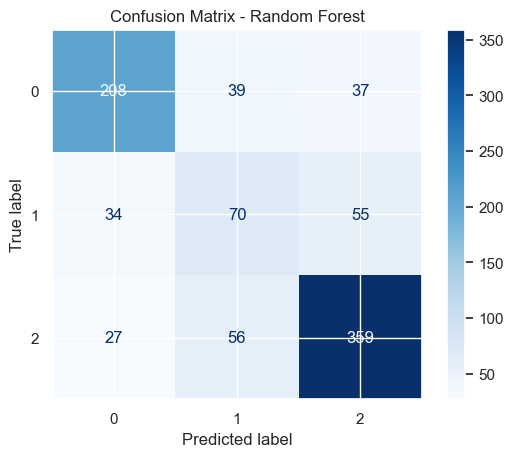

<Figure size 1000x800 with 0 Axes>

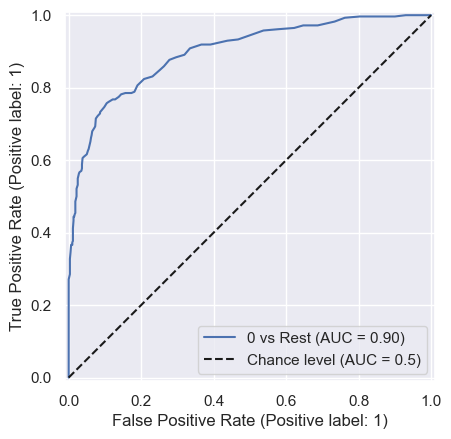

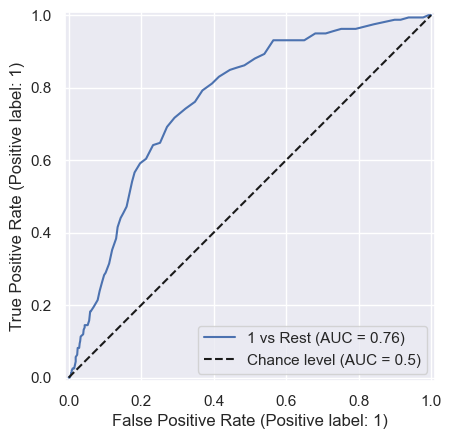

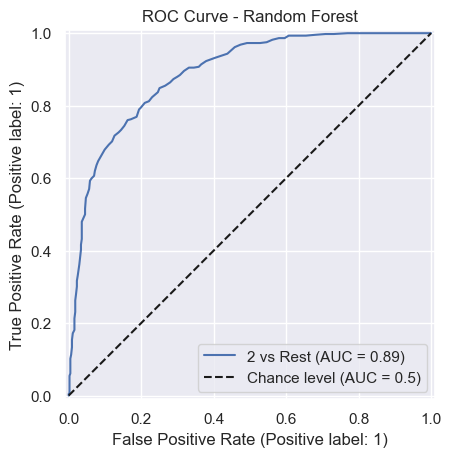


=== Logistic Regression ===
Accuracy: 0.7017
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.64      0.73       284
           1       0.37      0.64      0.47       159
           2       0.85      0.76      0.80       442

    accuracy                           0.70       885
   macro avg       0.69      0.68      0.67       885
weighted avg       0.76      0.70      0.72       885



<Figure size 800x600 with 0 Axes>

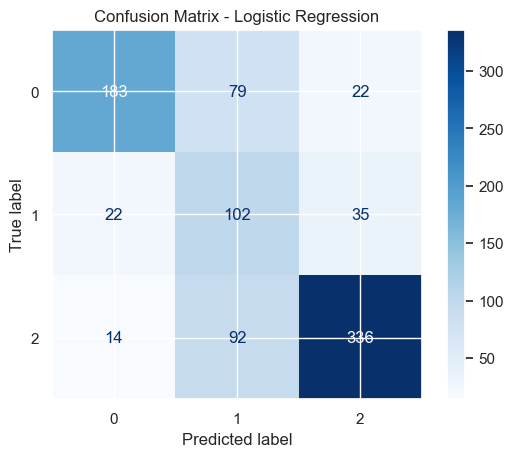

<Figure size 1000x800 with 0 Axes>

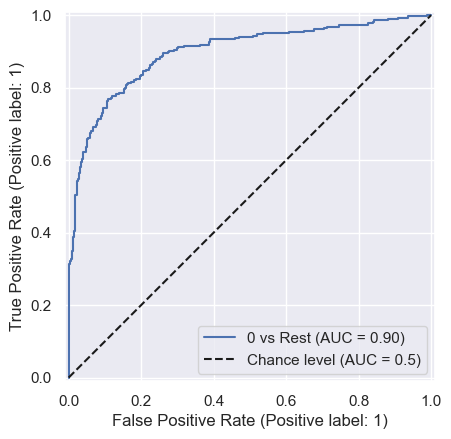

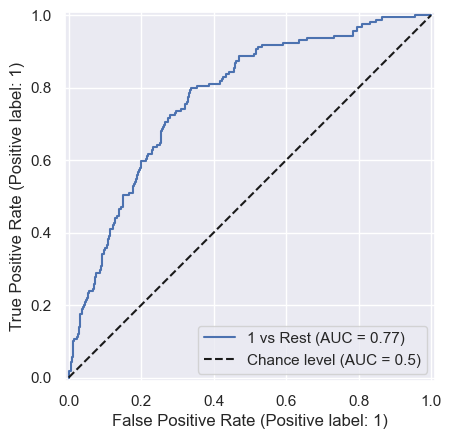

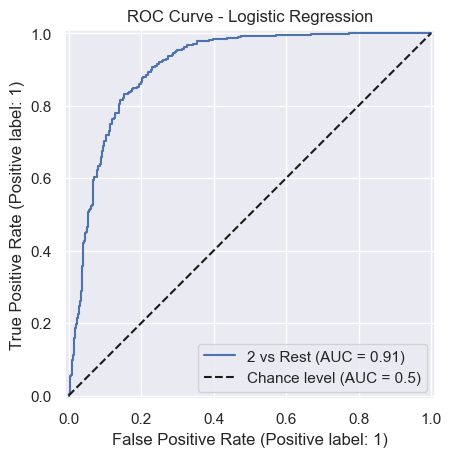


=== Gradient Boosting ===
Accuracy: 0.6938
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.67      0.73       284
           1       0.38      0.60      0.46       159
           2       0.83      0.74      0.78       442

    accuracy                           0.69       885
   macro avg       0.67      0.67      0.66       885
weighted avg       0.74      0.69      0.71       885



<Figure size 800x600 with 0 Axes>

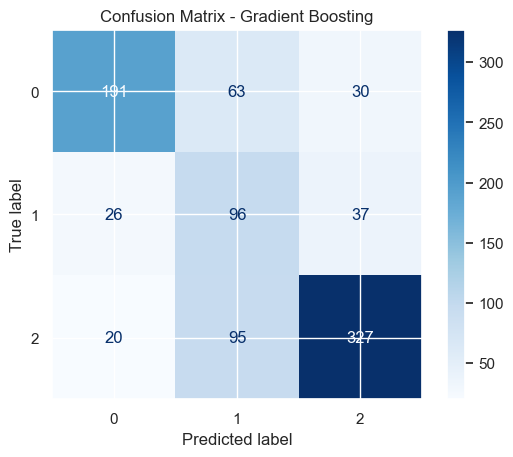

<Figure size 1000x800 with 0 Axes>

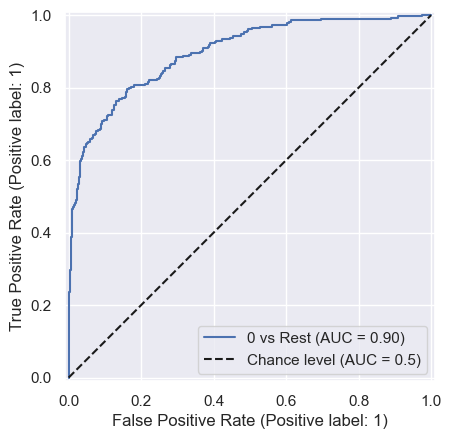

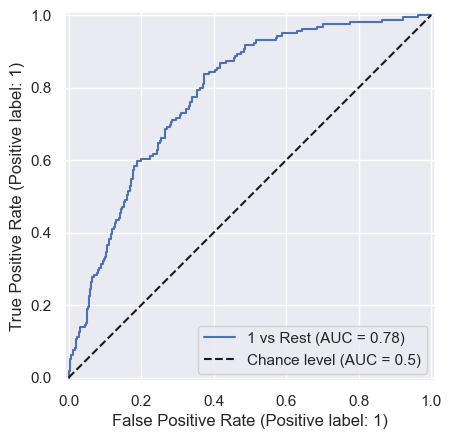

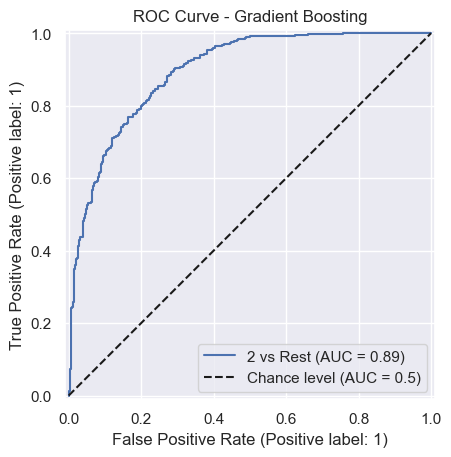


=== XGBRF ===
Accuracy: 0.6768
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.65      0.72       284
           1       0.36      0.60      0.45       159
           2       0.81      0.72      0.76       442

    accuracy                           0.68       885
   macro avg       0.66      0.66      0.65       885
weighted avg       0.73      0.68      0.69       885



<Figure size 800x600 with 0 Axes>

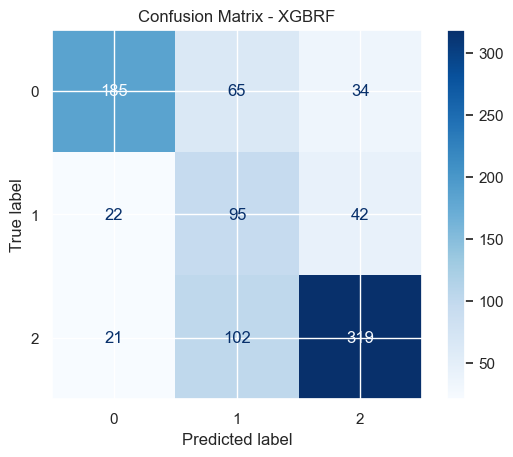

<Figure size 1000x800 with 0 Axes>

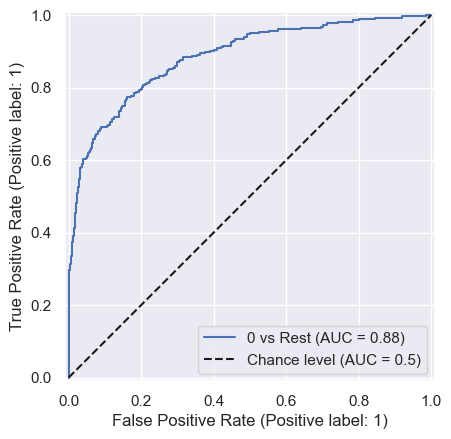

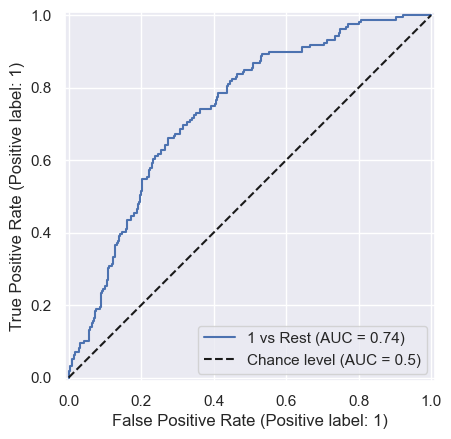

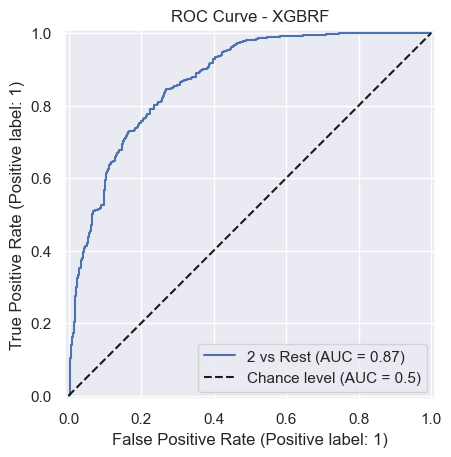

In [23]:
# Definisikan beberapa model untuk perbandingan
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBRF': XGBRFClassifier(random_state=42)
}

# Evaluasi semua model menggunakan data yang sudah di-SMOTE
results = {}
for name, model in models.items():
    trained_model, acc, rep = train_evaluate_model(X_train_balanced, y_train_balanced, X_test_pca, y_test, name, model)
    results[name] = {'model': trained_model, 'accuracy': acc, 'report': rep}

Berdasarkan hasil evaluasi, Random Forest dan Logistic Regression yang mencolok berdasarkan performanya. Logistic Regression menjadi pilihan model karena memiliki beberapa keunggulan yang signifikan:

1. Precision yang lebih tinggi untuk kelas Dropout (0) dan Graduate (2):
    - Logistic Regression: 0.84 (Dropout) dan 0.85 (Graduate)
    - Random Forest: 0.77 (Dropout) dan 0.80 (Graduate)

2. Kemampuan mengidentifikasi kelas Enrolled (1) lebih baik:
    - Logistic Regression memiliki recall 0.64 untuk kelas Enrolled
    - Random Forest hanya 0.44 untuk kelas yang sama

3. Performa ROC yang lebih baik:
    - AUC untuk Graduate vs Rest: 0.91 pada Logistic Regression vs 0.89 pada Random Forest
    - AUC untuk Enrolled vs Rest: 0.77 pada Logistic Regression vs 0.76 pada Random Forest

4. Keseimbangan performa antar kelas:
    - Macro avg recall: 0.68 (Logistic Regression) vs 0.66 (Random Forest)
    - Ini menunjukkan Logistic Regression lebih seimbang dalam mengenali semua kelas

5. Interpretabilitas model:
    - Logistic Regression juga menawarkan interpretabilitas yang lebih baik, di mana kita bisa melihat koefisien untuk memahami pengaruh setiap fitur


Meskipun akurasi keseluruhan sedikit lebaih rendah (70.17% vs 71.98%), keunggulan dalam precision dan recall untuk kelas-kelas penting (terutama Dropout dan Enrolled) membuat Logistic Regression lebih cocok untuk implementasi di dunia nyata, terutama jika tujuan utamanya adalah mengidentifikasi siswa yang berisiko dropout untuk intervensi dini.

#### Hyperparameter Tuning

In [24]:
import optuna

In [25]:
# Fungsi objektif untuk Optuna - Logistic Regression
def objective_lr(trial):
    # Parameter yang akan dioptimalkan
    C = trial.suggest_float('C', 0.001, 10.0, log=True)
    solver = trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    
    # Jika solver adalah 'liblinear', kita bisa juga mengoptimalkan penalty
    if solver == 'liblinear':
        penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    else:
        penalty = 'l2' # Solver lain hanya mendukung l2
    
    # Membuat model dengan parameter yang diusulkan 
    model = LogisticRegression(
        C=C,
        solver=solver,
        max_iter=max_iter,
        penalty=penalty,
        random_state=42
    )
    
    # Melatih model
    model.fit(X_train_balanced, y_train_balanced)
    
    # Prediksi
    y_pred = model.predict(X_test_pca)
    
    # Menggunakan f1_macro sebagai metrik optimasi
    # Karena kita ingin model yang seimbang untuk semua kelas
    f1 = f1_score(y_test, y_pred, average='macro')
    
    return f1


In [26]:
# Membuat study Optuna
study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(objective_lr, n_trials=100) 

# Mendapatkan parameter terbaik
best_params_lr = study_lr.best_params
print("Best parameters for Logistic Regression:", best_params_lr)
print(f"Best F1-macro score: {study_lr.best_value:.4f}")

# Membuat model final dengan parameter terbaik
if 'penalty' not in best_params_lr and best_params_lr['solver'] == 'liblinear':
    best_params_lr['penalty'] = 'l2' # Default jika tidak ada dalam params
    
final_lr_model = LogisticRegression(
    C=best_params_lr['C'],
    solver=best_params_lr['solver'],
    max_iter=best_params_lr['max_iter'],
    penalty=best_params_lr.get('penalty', 'l2'),
    random_state=42
)

# Melatih model final
final_lr_model.fit(X_train_balanced, y_train_balanced)

# Evaluasi model final
y_pred_final = final_lr_model.predict(X_test_pca)
print("\nFinal Model Evaluation:")
print(classification_report(y_test, y_pred_final))

[I 2025-05-26 12:12:34,667] A new study created in memory with name: no-name-fd112e78-0312-4266-8f6c-099680cd8fcf
[I 2025-05-26 12:12:34,926] Trial 0 finished with value: 0.6617114719293825 and parameters: {'C': 0.0019212614519822041, 'solver': 'sag', 'max_iter': 834}. Best is trial 0 with value: 0.6617114719293825.
[I 2025-05-26 12:12:35,148] Trial 1 finished with value: 0.6637565317000801 and parameters: {'C': 0.03364578362858968, 'solver': 'sag', 'max_iter': 982}. Best is trial 1 with value: 0.6637565317000801.
[I 2025-05-26 12:12:35,277] Trial 2 finished with value: 0.6629552496487979 and parameters: {'C': 0.017846551465234645, 'solver': 'newton-cg', 'max_iter': 377}. Best is trial 1 with value: 0.6637565317000801.
[I 2025-05-26 12:12:35,509] Trial 3 finished with value: 0.6682156120716375 and parameters: {'C': 9.701376243679691, 'solver': 'sag', 'max_iter': 180}. Best is trial 3 with value: 0.6682156120716375.
[I 2025-05-26 12:12:35,603] Trial 4 finished with value: 0.663719037278

Best parameters for Logistic Regression: {'C': 9.701376243679691, 'solver': 'sag', 'max_iter': 180}
Best F1-macro score: 0.6682

Final Model Evaluation:
              precision    recall  f1-score   support

           0       0.84      0.64      0.73       284
           1       0.37      0.64      0.47       159
           2       0.85      0.76      0.80       442

    accuracy                           0.70       885
   macro avg       0.69      0.68      0.67       885
weighted avg       0.76      0.70      0.72       885



<Figure size 800x600 with 0 Axes>

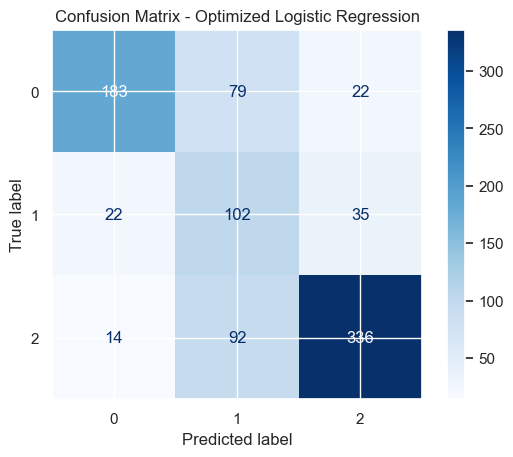

In [27]:
# Visualisasi confusion matrix
cm_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_final, display_labels=final_lr_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Optimized Logistic Regression')
plt.show()

C:\Users\Aldi\AppData\Local\Temp\ipykernel_13496\3910845163.py:3: ExperimentalWarning:

plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.



<Figure size 1000x600 with 0 Axes>

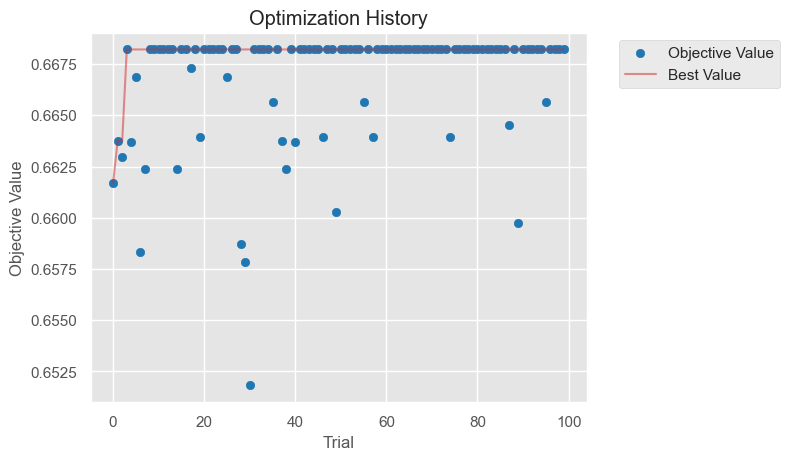

In [28]:
# Visualisasi hasil optimasi
plt.figure(figsize=(10, 6))
optuna.visualization.matplotlib.plot_optimization_history(study_lr)
plt.title('Optimization History')
plt.show()

C:\Users\Aldi\AppData\Local\Temp\ipykernel_13496\1452758738.py:2: ExperimentalWarning:

plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.



<Figure size 1000x600 with 0 Axes>

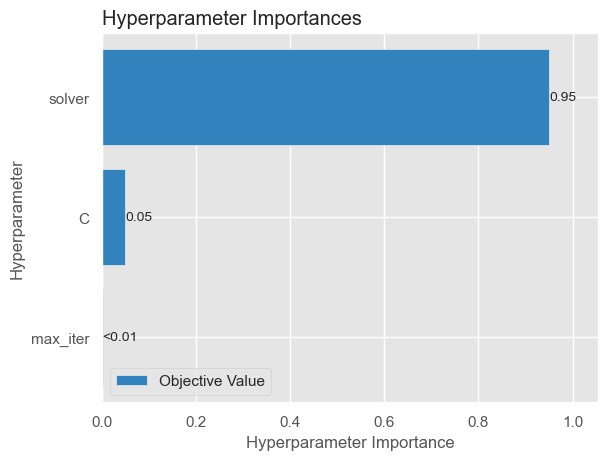

In [29]:
plt.figure(figsize=(10, 6))
optuna.visualization.matplotlib.plot_param_importances(study_lr)
plt.show()

#### Export Model

In [30]:
import joblib
import os 

# Buat direktori model jika belum ada
if not os.path.exists('models'):
    os.makedirs('models')
    print("Direktori models berhasil dibuat")
    

# Simpan model final yang sudah dioptimalkan
joblib.dump(final_lr_model, './models/final_lr_model.pkl')

# Simpan pipeline preprocessing (termasuk PCA)
joblib.dump(pca_pipeline, './models/preprocessing_pipeline.pkl')

# Simpan label encoder untuk mengkonversi kembali prediksi numerik ke label
joblib.dump(label_encoder, './models/label_encoder.pkl')

# Opsional: Simpang juga model Random Forest sebagai alternatif
joblib.dump(results['Random Forest']['model'], './models/random_forest.pkl')

print("Model dan pipeline berhasil disimpan")

Model dan pipeline berhasil disimpan


In [31]:
df.to_csv('./data/data_parsed_separator.csv', index=False, sep=',')